<a href="https://colab.research.google.com/github/cleysonl/Tensorflow2.0/blob/master/Tensorflow_2_0_CC_CLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 3.8MB 70.0MB/s 
     |████████████████████████████████| 450kB 65.2MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


## **1. Basics**

### **Tensors**

In [3]:
#constant tensor
x = tf.constant([[3,4],[2,1]])
print(x)

tf.Tensor(
[[3 4]
 [2 1]], shape=(2, 2), dtype=int32)


In [4]:
# Convert the value to numpy array
x.numpy()

array([[3, 4],
       [2, 1]], dtype=int32)

In [5]:
# As numpy array, it has the attribute dtype and shape:
print('dtype:', x.dtype)
print('shape:', x.shape)


dtype: <dtype: 'int32'>
shape: (2, 2)


In [6]:
# Arrays of ones an zeros
print(tf.ones(shape=(2,1)))
print(tf.zeros(shape=(2,1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


### **Random constant tensors**

In [7]:
tf.random.normal(shape=(2,2),mean =0., stddev = 1.)

<tf.Tensor: id=12, shape=(2, 2), dtype=float32, numpy=
array([[-1.2564629 , -0.20302285],
       [-0.02280908,  1.8496665 ]], dtype=float32)>

In [8]:
tf.random.uniform(shape=(2,2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: id=16, shape=(2, 2), dtype=int32, numpy=
array([[7, 1],
       [8, 0]], dtype=int32)>

### **Variables**

In [9]:
initial_value = tf.random.normal(shape=(2,2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.03592575, -0.03567953],
       [ 0.4780315 , -1.9333409 ]], dtype=float32)>


In [10]:
new_value = tf.random.normal(shape=(2,2))
a.assign(new_value)
print(a)
for i in range(2):
  for j in range(2):
    assert a[i,j]==new_value[i,j]
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.25629857, 2.4883702 ],
       [1.4939765 , 1.2810993 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.25629857, 2.4883702 ],
       [1.4939765 , 1.2810993 ]], dtype=float32)>


In [11]:
added_value = tf.random.normal(shape=(2,2))
a.assign_add(added_value)
print(a)
for i in range(2):
  for j in range(2):
    assert a[i,j]== new_value[i,j] + added_value[i,j]
print(a)    

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.06405538,  3.9712892 ],
       [ 1.4295313 , -0.5108534 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.06405538,  3.9712892 ],
       [ 1.4295313 , -0.5108534 ]], dtype=float32)>


### **Doing math in TF**

In [0]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

### **Computing gradient with** 'GradientTape'

In [13]:
a = tf.random.uniform(shape=(2,2))
b = tf. random.uniform(shape=(2,2))

a= tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.sqrt(b))
  dc_da = tape.gradient(c,a)
  print(dc_da)

tf.Tensor(
[[0.8043656  0.70878136]
 [0.46977928 0.10274385]], shape=(2, 2), dtype=float32)


In [14]:
# High-order derivatives with nesting tapes
with tf.GradientTape() as outer_tape:
  with tf. GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c,a)
  dc2_da2= outer_tape.gradient(dc_da,a)
  print(dc2_da2)

tf.Tensor(
[[0.0733819  0.26624453]
 [0.337682   1.1547353 ]], shape=(2, 2), dtype=float32)


### **End to end example: linear regression**

In [0]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

#Weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features,w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x,y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)

    dloss_dw, dloss_db = tape.gradient(loss, [w,b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Generate artificial data for our model

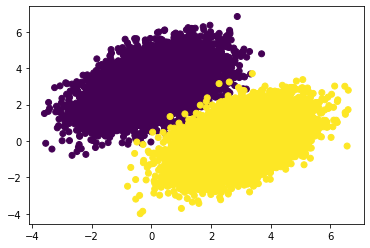

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#Prepare the dataset
num_samples =10000
negative_samples = np.random.multivariate_normal(mean =[0,3], cov=[[1,0.5],[0.5,1]], size = num_samples)
positive_samples = np.random.multivariate_normal(mean =[3,0], cov=[[1,0.5],[0.5,1]], size = num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples,1), dtype ='float32'),
                   np.ones((num_samples,1), dtype = 'float32')))

plt.scatter(features[:,0], features[:,1], c=labels[:,0])